## Sentimental Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
from wordcloud import WordCloud

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
test = pd.read_excel('Sentimental_Analysis.xlsx')
test.head()

,Are you being equipped with the right skills and training opportunities to perform your job?
0,Absoultely not - moved to a new multi-client t...
1,Cloud security training was provided by Capgem...
2,equipped with right skill but training not sch...
3,"Finally, I can say so. It's been almost two ye..."
4,For the most part yes. Occassionally the train...


In [3]:
test = test.rename(columns={"Are you being equipped with the right skills and training opportunities to perform your job?": "Comment"})
print(type(test))
test.head()

<class 'pandas.core.frame.DataFrame'>


,Comment
0,Absoultely not - moved to a new multi-client t...
1,Cloud security training was provided by Capgem...
2,equipped with right skill but training not sch...
3,"Finally, I can say so. It's been almost two ye..."
4,For the most part yes. Occassionally the train...


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
test['Comment'] = test['Comment'].apply(cleanTxt)

# Show the cleaned tweets
test

,Comment
0,Absoultely not - moved to a new multi-client t...
1,Cloud security training was provided by Capgem...
2,equipped with right skill but training not sch...
3,"Finally, I can say so. It's been almost two ye..."
4,For the most part yes. Occassionally the train...
5,For the most part yes. Occassionally the train...
6,"Generally I am an after thought, when someone ..."
7,I am already with right skills to perform job....
8,"I am equipped with right skills, but the curre..."
9,I am using my existing skills and other traini...


In [32]:
test.head()

,Comment
0,Absoultely not - moved to a new multi-client t...
1,Cloud security training was provided by Capgem...
2,equipped with right skill but training not sch...
3,"Finally, I can say so. It's been almost two ye..."
4,For the most part yes. Occassionally the train...


## Subjectivity and Polarity

In [33]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


test['Subjectivity'] = test['Comment'].apply(getSubjectivity)

test['Polarity'] = test['Comment'].apply(getPolarity)

test.head()

,Comment,Subjectivity,Polarity
0,Absoultely not - moved to a new multi-client t...,0.552273,-0.053693
1,Cloud security training was provided by Capgem...,0.066667,0.000000
2,equipped with right skill but training not sch...,0.535714,0.285714
3,"Finally, I can say so. It's been almost two ye...",0.397078,0.144481
4,For the most part yes. Occassionally the train...,0.483333,0.183333


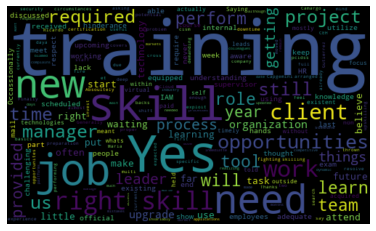

In [34]:
#WordCloud

allWords = ' '.join([x for x in test['Comment']])

wordCloud = WordCloud(width=500, height=300, random_state=1, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Neagtive, Neutral and Positive

In [35]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    
    elif score == 0:
        return 'Neutral'
    
    else:
        return 'Positive'
    

test['Analysis'] = test['Polarity'].apply(getAnalysis)

test

,Comment,Subjectivity,Polarity,Analysis
0,Absoultely not - moved to a new multi-client t...,0.552273,-0.053693,Negative
1,Cloud security training was provided by Capgem...,0.066667,0.000000,Neutral
2,equipped with right skill but training not sch...,0.535714,0.285714,Positive
3,"Finally, I can say so. It's been almost two ye...",0.397078,0.144481,Positive
4,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive
5,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive
6,"Generally I am an after thought, when someone ...",0.416667,0.150000,Positive
7,I am already with right skills to perform job....,0.272565,0.105519,Positive
8,"I am equipped with right skills, but the curre...",0.634323,0.181725,Positive
9,I am using my existing skills and other traini...,0.375000,-0.125000,Negative


In [36]:
test.head()

,Comment,Subjectivity,Polarity,Analysis
0,Absoultely not - moved to a new multi-client t...,0.552273,-0.053693,Negative
1,Cloud security training was provided by Capgem...,0.066667,0.000000,Neutral
2,equipped with right skill but training not sch...,0.535714,0.285714,Positive
3,"Finally, I can say so. It's been almost two ye...",0.397078,0.144481,Positive
4,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive


In [37]:
## Printing Positive Tweets

In [38]:
j = 1
sortedtest = test.sort_values(by=['Polarity'])

for i in range(0, sortedtest.shape[0]):
    if( sortedtest['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedtest['Comment'][i])
        j= j+1

1) equipped with right skill but training not scheduled.
2) Finally, I can say so. It's been almost two years in which, due to circumstances, we've been asking for a specific training (CEH), useful for employees and also for the company in the search of new clients. Thanks to Ricardo Camargo and Maria Gutierrez, we have been able to attend that training and exam
3) For the most part yes. Occassionally the training opportunities are few and far between which can be a hinderance, but over all, yes, I believe there is adequate training for you to start the learning process.
4) For the most part yes. Occassionally the training opportunities are few and far between which can be a hinderance, but over all, yes, I believe there is adequate training for you to start the learning process.
5) Generally I am an after thought, when someone backs out of training, But I am the first in mind when to do a fire fighting or resolve a problem
6) I am already with right skills to perform job. However , th

In [39]:
j = 1
sortedtest = test.sort_values(by=['Polarity'], ascending = 'False')

for i in range(0, sortedtest.shape[0]):
    if( sortedtest['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedtest['Comment'][i])
        j= j+1

1) Absoultely not - moved to a new multi-client team with no training and put on shift with 12 clients with very little preparation or understanding of any of the clients themselves.
2) I am using my existing skills and other trainings will be discussed with my manager.
3) I am using my existing skills and other trainings will be discussed with my manager.
4) I have received little to no training for the role i currently perform, staff are thrown into the deep end and expected to use applications and processes they have received no training for.  If mistakes are made, as invariably they are, they are then blamed.
5) not at all. i have spoken to my manager several times regarding my training on upcoming IDAM technology but always left with empty hands.
6) Random training we attend without any goal of utilization of knowledge in future.
7) Training courses are available but not necessarily relevant to role. There is also very little time or opportunities to engage in training or self dev

In [40]:
j = 1
sortedtest = test.sort_values(by=['Polarity'], ascending = 'False')

for i in range(0, sortedtest.shape[0]):
    if( sortedtest['Analysis'][i] == 'Neutral'):
        print(str(j) + ') ' + sortedtest['Comment'][i])
        j= j+1

1) Cloud security training was provided by Capgemini last year
2) No. Training is non-existent. It's 100% 'on the job' training.
3) Sometimes, client work often overtakes training in prioritization, leaving a bit of a gap in skill to capability and still requires the job to be done
4) the team keeps getting promised training and certificates but do not actually get them. Last time I applied for a exam to be paid for by Cap, the entire process of getting it has been over a year
5) Training needs will be covered soon as told by management
6) waiting for some trainings
7) Yes , I have a skills to perform the work
8) yes and still thought of learning out of box.
9) yes but still some trainings are there which I wanted to Opt for but still waiting from tower end for the process.
10) Yes I am being timely trainings required to upgrade my skills
11) Yes I am being timely trainings required to upgrade my skills
12) Yes i have been given training
13) Yes I have the skill to perform the job , bu

In [7]:
## PLOTTING
test.shape[0]

53

Text(0, 0.5, 'Counts')

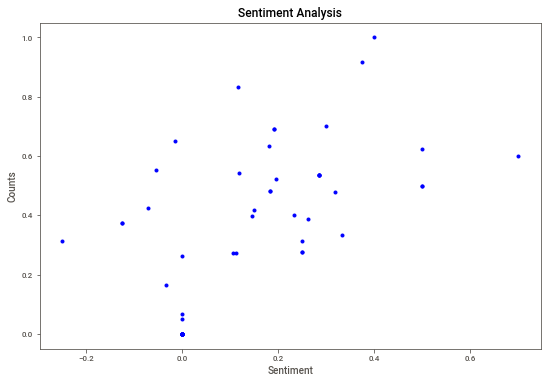

In [42]:
plt.figure(figsize=(8,6))
for i in range(0, test.shape[0]):
    plt.scatter(test['Polarity'][i], test['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')


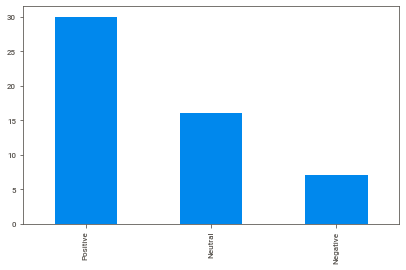

In [43]:
test['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [44]:
test

,Comment,Subjectivity,Polarity,Analysis
0,Absoultely not - moved to a new multi-client t...,0.552273,-0.053693,Negative
1,Cloud security training was provided by Capgem...,0.066667,0.000000,Neutral
2,equipped with right skill but training not sch...,0.535714,0.285714,Positive
3,"Finally, I can say so. It's been almost two ye...",0.397078,0.144481,Positive
4,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive
5,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive
6,"Generally I am an after thought, when someone ...",0.416667,0.150000,Positive
7,I am already with right skills to perform job....,0.272565,0.105519,Positive
8,"I am equipped with right skills, but the curre...",0.634323,0.181725,Positive
9,I am using my existing skills and other traini...,0.375000,-0.125000,Negative


In [45]:
test.to_excel('SentimentalAnalysis_Final.xlsx')

In [46]:
test.head()

,Comment,Subjectivity,Polarity,Analysis
0,Absoultely not - moved to a new multi-client t...,0.552273,-0.053693,Negative
1,Cloud security training was provided by Capgem...,0.066667,0.000000,Neutral
2,equipped with right skill but training not sch...,0.535714,0.285714,Positive
3,"Finally, I can say so. It's been almost two ye...",0.397078,0.144481,Positive
4,For the most part yes. Occassionally the train...,0.483333,0.183333,Positive


In [47]:
import sweetviz
sweetviz_report = sweetviz.analyze([test[['Subjectivity', 'Polarity', 'Analysis']], 'Report'])
html = sweetviz_report.show_html()

:FEATURES DONE:                    |                     | [  0%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


<h1><center>THANK YOU</center></h1>